In [1]:
import pandas as pd
from sklearn import preprocessing as prep
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
test.head()
#test.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Visualize the shape of data, the type of data , the missing values , unique counts , and build a data dictionary dataframe.   

In [2]:
train.shape

(891, 12)

In [3]:
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(train.dtypes)
Data_dict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [4]:
# identifying the missing values from the dataset.

Data_dict['MissingVal'] = train.isnull().sum()
Data_dict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [5]:
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.

Data_dict['UniqueVal'] = train.nunique()
Data_dict

,0,MissingVal,UniqueVal
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [6]:
# identifying count of the variable.

Data_dict['Count'] = train.count()
Data_dict

,0,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [7]:
# renaming the first column using rename()

Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


## Run discriptive statistics on objects and other  numerical datatypes.

In [9]:
# get discriptive statistics on "objects" datatypes
train.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mullens, Miss. Katherine ""Katie""",male,1601,G6,S
freq,1,577,7,4,644


In [8]:
# get discriptive statistics on "number" datatypes
train.describe(include = ['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Applying Univariate and Multivariate Data Analysis using graphical representations

### Univariate Data Analysis

c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


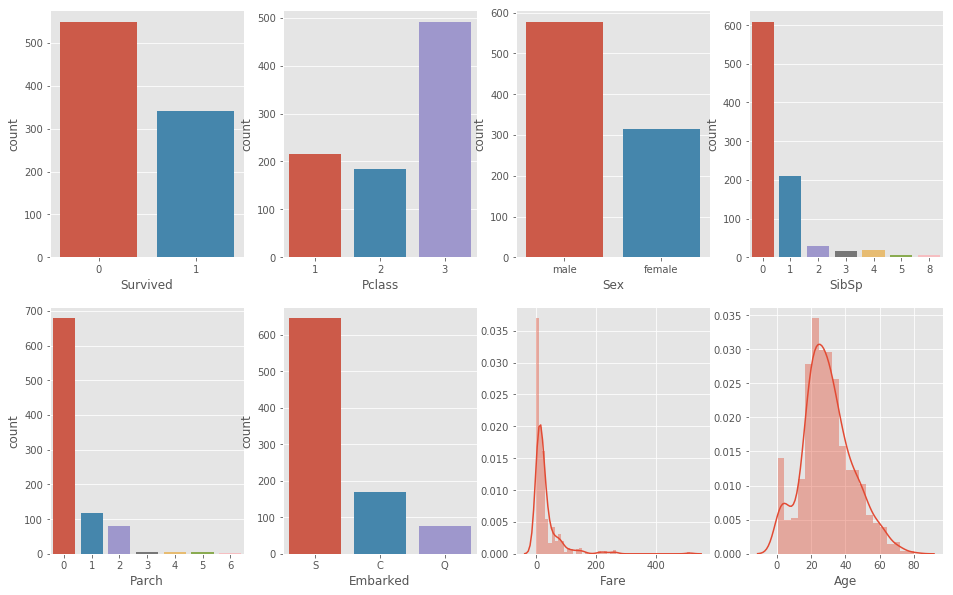

In [9]:
fig , axes = plt.subplots(2, 4, figsize = (16,10) )
sns.countplot('Survived' , data = train, ax = axes[0,0])
sns.countplot('Pclass' , data = train, ax = axes[0,1])
sns.countplot('Sex' , data = train, ax = axes[0,2])
sns.countplot('SibSp' , data = train, ax = axes[0,3])
sns.countplot('Parch' , data = train, ax = axes[1,0])
sns.countplot('Embarked' , data = train, ax = axes[1,1])
sns.distplot(train['Fare'] , kde = True , ax = axes[1,2])
sns.distplot(train['Age'].dropna() , kde = True , ax = axes[1,3])

### Bivariate Data Analysis

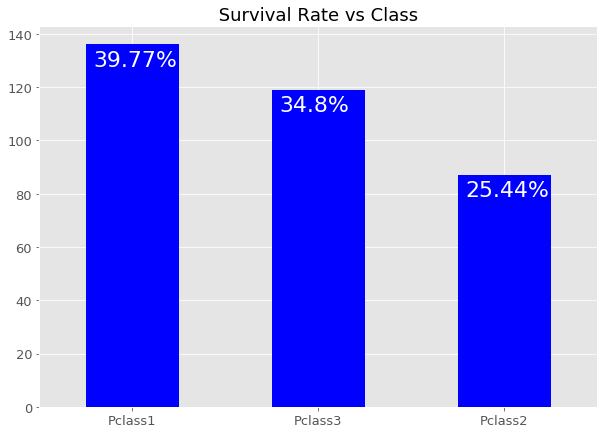

In [10]:
Pclass_survival = train[train.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Pclass.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks(np.arange(3), ['Pclass1' , 'Pclass3','Pclass2'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Survival Rate vs Class ", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()-8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')


### Joint Plot 

c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


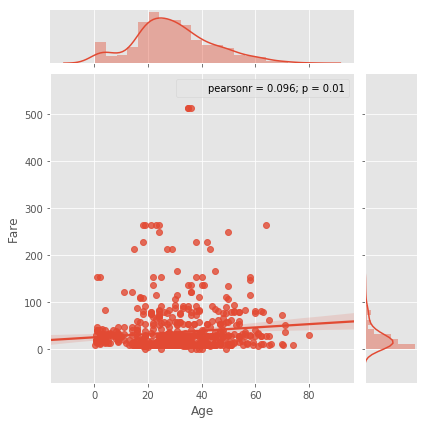

In [11]:
sns.jointplot(x = 'Age' , y = 'Fare' , data = train, kind = 'reg');

## Multivariate Data Analysis

### There is a positive correlation between Fare and Survived and negative correlation between Pclass and Survived, Fare and Pclass , Age and Pclass.

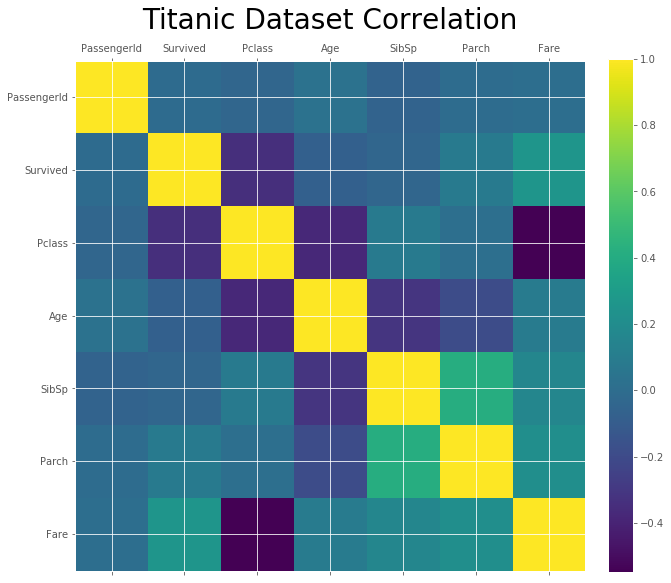

In [12]:
# For multivariate data analysis I've used pandas "correlation matrix" . You can also use seaborn "heatmap".
def plotting_corr( train , size = 10):
    corr = train.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Titanic Dataset Correlation' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(train , size = 10)


## Feature Engineering on Titanic Dataset

In [13]:
# concate test and train dataset

titanic_dataset = train.append(test , ignore_index = True)
titanic_dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [14]:
# shape of titanic dataset
titanic_dataset.shape

(1309, 12)

In [15]:
titanic_dataset.Sex.unique()

array(['male', 'female'], dtype=object)

In [16]:
# creating a label encoder which encodes integer features using one hot encoding

le = prep.LabelEncoder()

In [17]:
#fitting label encoder
le.fit(titanic_dataset.Sex)
le.classes_

array(['female', 'male'], dtype=object)

In [18]:
#transforming labels to normalised encoding "1" for male & "0" for female.
Sex_le = le.transform(titanic_dataset.Sex)
Sex_le[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [19]:
# creating a copy of the original dataset
titanic_dataset_le = titanic_dataset.copy()
titanic_dataset_le.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [20]:
# Replacing the "Sex" column with normalised values(Sex_le)
titanic_dataset_le.Sex = Sex_le
titanic_dataset_le.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


In [21]:
titanic_dataset.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [22]:
print(titanic_dataset.Age.unique())
print(titanic_dataset.Cabin.unique())
print(titanic_dataset.Fare.unique())
print(titanic_dataset.Parch.unique())
print(titanic_dataset.PassengerId.unique())
print(titanic_dataset.Pclass.unique())
print(titanic_dataset.Sex.unique())
print(titanic_dataset.SibSp.unique())
print(titanic_dataset.Embarked.unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32

In [23]:
# remove nans and fill it with '0's
embarked = titanic_dataset['Embarked'].fillna('0')
embarked.unique()

array(['S', 'C', 'Q', '0'], dtype=object)

In [25]:
titanic_dataset_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [28]:
# We see that there are 17 entries in the Fare column as "0" .
print((titanic_dataset_le.Fare==0).sum())

17


In [37]:
print(titanic_dataset_le.Fare.mean())

33.7282186909655


In [38]:
titanic_dataset_le.Fare = titanic_dataset_le.Fare.replace(0 , 33.29547928134557)
#print((titanic_dataset_le.Fare==0).sum())

In [49]:
titanic_dataset_le.Age.fillna(titanic_dataset_le.Age.mean() , inplace = True)

In [51]:
titanic_dataset_le[titanic_dataset_le.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [65]:
titanic_dataset_le.Cabin.isnull().mean()

0.774637127578304

In [66]:
titanic_dataset_le[titanic_dataset_le.Survived.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
891,34.500000,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,1,0,NaN,330911
892,47.000000,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,0,1,NaN,363272
893,62.000000,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,1,0,NaN,240276
894,27.000000,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,1,0,NaN,315154
895,22.000000,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,0,1,NaN,3101298
896,14.000000,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,1,0,NaN,7538
897,30.000000,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,0,0,NaN,330972
898,26.000000,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,1,1,NaN,248738
899,18.000000,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,0,0,NaN,2657
900,21.000000,NaN,S,24.1500,"Davies, Mr. John Samuel",0,901,3,1,2,NaN,A/4 48871


In [62]:
titanic_dataset_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [64]:
titanic_dataset_le.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [71]:
titanic_dataset_le = titanic_dataset_le[['Age' , 'Sex' , 'Name' , 'Fare' , 'Parch' , 'PassengerId' , 'Pclass' ,'Embarked'  , 'SibSp' , 'Survived' , 'Ticket']]

In [74]:
titanic_dataset_le.shape

(1309, 11)

In [79]:
titanic_dataset_le = titanic_dataset_le.iloc[:891].copy()
titanic_dataset_le.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Age            891 non-null float64
Sex            891 non-null int64
Name           891 non-null object
Fare           891 non-null float64
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Embarked       889 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(5), object(3)
memory usage: 76.6+ KB


In [87]:
titanic_dataset_le = titanic_dataset_le.dropna()
titanic_dataset_le.isnull().sum()

Age            0
Sex            0
Name           0
Fare           0
Parch          0
PassengerId    0
Pclass         0
Embarked       0
SibSp          0
Survived       0
Ticket         0
dtype: int64

In [101]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

X_Age = titanic_dataset_le[['Age']].values
y = titanic_dataset_le['Survived'].values

# Use the fit method to train
logreg.fit(X_Age,y)

# Make a prediction
y_predict = logreg.predict(X_Age)
y_predict[:10]
(y == y_predict).mean()


0.6175478065241845

In [103]:
X_Fare = titanic_dataset_le[['Fare']].values
y = titanic_dataset_le['Survived'].values

# Use the fit method to train
logreg.fit(X_Fare,y)

# Make a prediction
y_predict = logreg.predict(X_Fare)
y_predict[:10]
(y == y_predict).mean()

0.6647919010123734

In [107]:
X_Sex = titanic_dataset_le[['Sex']].values
y = titanic_dataset_le['Survived'].values

# Use the fit method to train
logreg.fit(X_Sex,y)

# Make a prediction
y_predict = logreg.predict(X_Sex)
y_predict[:10]
(y == y_predict).mean()

0.7862767154105736

In [112]:
from sklearn.tree import DecisionTreeClassifier
X=titanic_dataset_le[['Age', 'SibSp', 'Parch','Fare']].values 
y = titanic_dataset_le['Survived'].values
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X, y)
# Make a prediction
y_predict = clf.predict(X)
y_predict[:10]
(y == y_predict).mean()

0.7131608548931384